In [2]:
import tensorflow as tf
import numpy as np
import albumentations as A

from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Input
from keras import optimizers, models, layers, losses, metrics
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.image import resize

import pandas as pd
import matplotlib.pyplot as plt

## Згорткова нейронна мережа

Epoch 1/17
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5343 - accuracy: 0.8130 - val_loss: 0.3122 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 2/17
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3508 - accuracy: 0.8763 - val_loss: 0.3052 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 3/17
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3035 - accuracy: 0.8921 - val_loss: 0.2609 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 4/17
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2735 - accuracy: 0.9020 - val_loss: 0.2667 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 5/17
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2535 - accuracy: 0.9105 - val_loss: 0.2301 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 6/17
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2349 - accuracy: 0.9157 - val_loss: 0.2467 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 7/17
1875/1875 [==============================

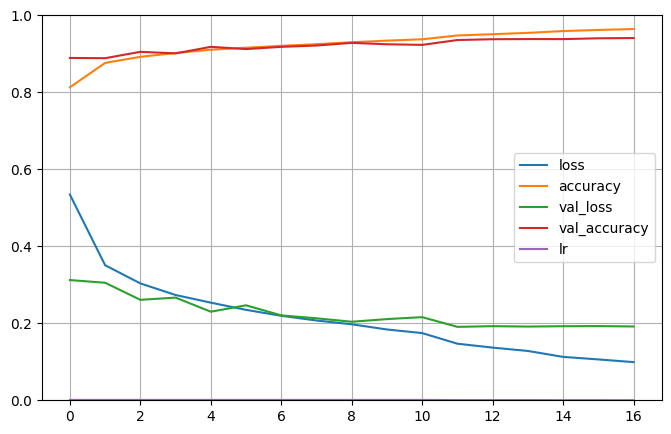

In [10]:
# Використання згорткових нейронних мереж

thresh = 0.95
initial_learning_rate = 0.001

def on_epoch_end(epoch, logs):
    if logs["val_accuracy"] > thresh:
        print(f"\nReached {thresh}% validation accuracy. Stopping training!")
        model.stop_training = True

lambda_cb = LambdaCallback(on_epoch_end=on_epoch_end)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=2)


lr_schedule_exp = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=False)

def create_model():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25, seed=0),
        Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Flatten(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
        loss=losses.sparse_categorical_crossentropy,
        metrics=['accuracy']
    )
    return model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = create_model()
history = model.fit(x_train,
                  y_train,
                  epochs=17,
                  batch_size=32,
                  validation_data=(x_test, y_test),
                  callbacks=[lambda_cb, reduce_lr_cb]
                  )

results1 = model.evaluate(x_test, y_test)
results2 = model.evaluate(x_train, y_train)

print(f'Train results: {results2}')
print(f'Test results: {results1}')
print(f'Difference accuracy: {results2[1] - results1[1]}')

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=class_names))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Згорткова нейронна мережа з аугментацією

Epoch 1/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9213 - accuracy: 0.6785 - val_loss: 0.7903 - val_accuracy: 0.7107 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6007 - accuracy: 0.7874 - val_loss: 0.6313 - val_accuracy: 0.7684 - lr: 0.0010
Epoch 3/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5209 - accuracy: 0.8174 - val_loss: 0.5482 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 4/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4725 - accuracy: 0.8342 - val_loss: 0.5135 - val_accuracy: 0.8105 - lr: 0.0010
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4469 - accuracy: 0.8440 - val_loss: 0.4970 - val_accuracy: 0.8225 - lr: 0.0010
Epoch 6/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4214 - accuracy: 0.8523 - val_loss: 0.4756 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 7/40
1875/1875 [==============================

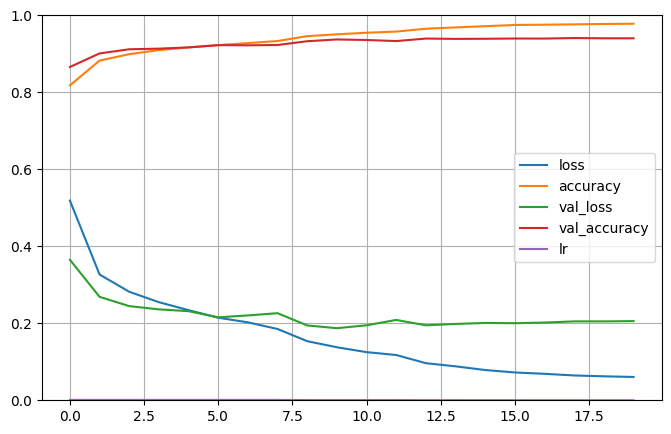

In [16]:
# Використання згорткових нейронних мереж з аугментацією

thresh = 0.95
initial_learning_rate = 0.001

def augment_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    image = tf.image.random_flip_left_right(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.central_crop(image, central_fraction=0.9)
    image = tf.image.resize_with_pad(image, target_height=28, target_width=28)

    return image, label

    # Apply the augmentations
    augmented_image = transform(image=image.numpy())['image']
    return augmented_image, label


def on_epoch_end(epoch, logs):
    if logs["val_accuracy"] > thresh:
        print(f"\nReached {thresh}% validation accuracy. Stopping training!")
        model.stop_training = True

lambda_cb = LambdaCallback(on_epoch_end=on_epoch_end)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

lr_schedule_exp = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=False)

def create_model():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25, seed=0),
        Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Flatten(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
        loss=losses.sparse_categorical_crossentropy,
        metrics=['accuracy']
    )
    return model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset
                 .shuffle(buffer_size=1024)
                 .batch(batch_size=32)
                 .map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .prefetch(tf.data.experimental.AUTOTUNE)
)


model = create_model()
hystory = model.fit(train_dataset,
          epochs=40,
          batch_size=256,
          validation_data=(x_test, y_test),
          callbacks=[lambda_cb, reduce_lr_cb]
      )

results1 = model.evaluate(x_test, y_test)
results2 = model.evaluate(train_dataset)

print(f'Train results: {results2}')
print(f'Test results: {results1}')
print(f'Difference accuracy: {results2[1] - results1[1]}')


class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=class_names))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Згорткова нейронна мережа з використанням донавчання та виділення ознак з VGG16

x_train shape: (60000, 48, 48, 3)
x_test shape: (10000, 48, 48, 3)

Epoch 1/15
938/938 [==============================] - 26s 25ms/step - loss: 0.4956 - accuracy: 0.8238 - val_loss: 0.5466 - val_accuracy: 0.8236 - lr: 0.0100
Epoch 2/15
938/938 [==============================] - 22s 24ms/step - loss: 0.3843 - accuracy: 0.8592 - val_loss: 0.4269 - val_accuracy: 0.8446 - lr: 0.0100
Epoch 3/15
938/938 [==============================] - 26s 27ms/step - loss: 0.3547 - accuracy: 0.8702 - val_loss: 0.3652 - val_accuracy: 0.8694 - lr: 0.0100
Epoch 4/15
938/938 [==============================] - 22s 24ms/step - loss: 0.3384 - accuracy: 0.8758 - val_loss: 0.3966 - val_accuracy: 0.8574 - lr: 0.0100
Epoch 5/15
938/938 [==============================] - 24s 26ms/step - loss: 0.3254 - accuracy: 0.8811 - val_loss: 0.4289 - val_accuracy: 0.8540 - lr: 0.0100
Epoch 6/15
938/938 [==============================] - 22s 24ms/step - loss: 0.2849 - accuracy: 0.8946 - val_loss: 0.3414 - val_accuracy: 0.8810 - l

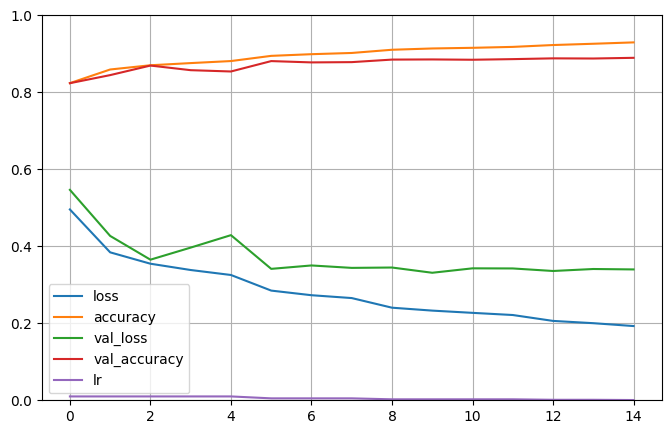

In [4]:
thresh = 0.91
initial_learning_rate = 0.01

def on_epoch_end(epoch, logs):
    if logs["val_accuracy"] > thresh:
        print(f"\nДосягнута точність на валідації {thresh}%. Зупинка навчання!")
        modified_model.stop_training = True

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
    conv_base,
    Flatten(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

modified_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=initial_learning_rate),
    loss=losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

lambda_cb = LambdaCallback(on_epoch_end=on_epoch_end)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=2)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape([-1, 784])
x_train = np.dstack([x_train]*3)
x_train = x_train.reshape(-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype('float32') / 255.
print('x_train shape:', x_train.shape)

x_test = x_test.reshape([-1, 784])
x_test = np.dstack([x_test]*3)
x_test = x_test.reshape(-1, 28, 28, 3)
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype('float32') / 255.
print('x_test shape:', x_test.shape)
print()


history = modified_model.fit(x_train,
                          y_train,
                          epochs=15,
                          batch_size=64,
                          validation_data=(x_test, y_test),
                          callbacks=[lambda_cb, reduce_lr_cb]
                          )

results1 = modified_model.evaluate(x_test, y_test)
results2 = modified_model.evaluate(x_train, y_train)

print(f'Train results: {results2}')
print(f'Test results: {results1}')
print(f'Difference in accuracy: {results2[1] - results1[1]}')

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

y_pred = modified_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_labels, target_names=class_names))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


## Висновок

Використавши перебір параметрів до кожної з мереж, можна зробити висновок, що датасет fashion_mnist найкраще навчається зі звичайною згортковою нейронною мережею, відповідно з якою точність на тестовій вибірці становить 94,09%. І відповідно до домашнього завдання №9, де ми використовували навчання звичайною нейронною мережею - там найкращий результат був 89,98%.

Щодо згорткових мереж з використанням VGG16 - то за рахунок того, що дані з параметру "imagenet" досить відрізняються до даних з датасету fashion_mnist, тому і навчання не було таким ефективним (88,95% в порівнянні зі звичайною згортковою мережею 94,09%)